<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Качество-модели-без-преобразования." data-toc-modified-id="Качество-модели-без-преобразования.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Качество модели без преобразования.</a></span></li><li><span><a href="#Качество-модели-с-преобразованием." data-toc-modified-id="Качество-модели-с-преобразованием.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Качество модели с преобразованием.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Загрузите и изучите данные.
    
    Ответьте на вопрос и обоснуйте решение.
    Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
    a. Изменится. Приведите примеры матриц.
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
    Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
    Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.


Описание данных

Набор данных находится в файле /datasets/insurance.csv. Скачать датасет.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score,f1_score, mean_squared_error
from sklearn.linear_model import LinearRegression 

In [2]:
insurance_df = pd.read_csv('/datasets/insurance.csv')

In [3]:
def explore_data(df):
    display(
        "Сводная информация:", df.info(),
        "10 строк:", df.head(10),
        "Столбцы:", df.columns,
        "Числовое описание:", df.describe(),
        "Сумма пропусков:", df.isna().sum(),
        "Доля пропусков:", df.isna().mean(),
        "Явные дубликаты:", df.duplicated().sum(),
        "Корреляция:", df.corr(),
        sns.heatmap(df.corr())
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


'Сводная информация:'

None

'10 строк:'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


'Столбцы:'

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

'Числовое описание:'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


'Сумма пропусков:'

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

'Доля пропусков:'

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

'Явные дубликаты:'

153

'Корреляция:'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


<AxesSubplot:>

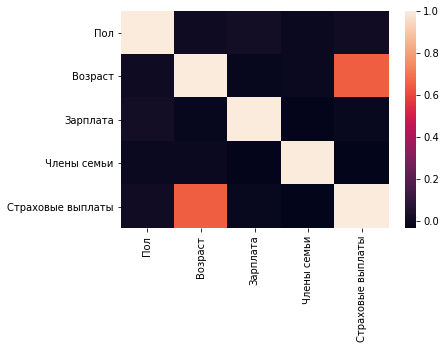

In [4]:
explore_data(insurance_df)

Обнаружены явные дубликаты, корреляция между возрастом и выплатами 0.65, в остальных случаях близка к нулю. Данные имеют разный масштаб

In [5]:
insurance_df = insurance_df.drop_duplicates().reset_index(drop=True)

In [6]:
insurance_df.columns = ['sex', 'age', 'salary', 'family_member', 'payments']

In [7]:
numeric = ['age', 'salary', 'family_member']

In [8]:
features = insurance_df.drop('payments', axis=1)
target = insurance_df['payments']

In [9]:
scaler = StandardScaler()
features[numeric] = scaler.fit_transform(features[numeric])

In [10]:
features.head()

,sex,age,salary,family_member
0,1,1.175436,0.973151,-0.185176
1,0,1.764564,-0.190115,-0.185176
2,0,-0.238471,-1.894901,-1.095466
3,0,-1.181076,0.180927,0.725115
4,1,-0.356297,-1.383465,-1.095466


<AxesSubplot:title={'center':'Распределение классов после разделения набора'}>

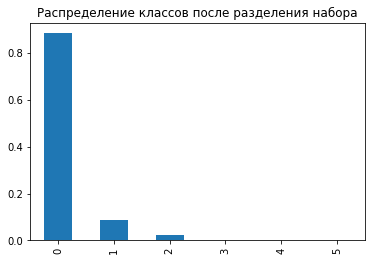

In [11]:
target.value_counts(normalize=True).plot(kind='bar', title='Распределение классов после разделения набора')

In [12]:
target.value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: payments, dtype: int64

### Вывод
В результате исследования данных было установлено, что
* присутствуют явные дубликаты
* корреляция между возрастом и выплатами 0.65, в остальных случаях близка к нулю.
* Данные имеют разный масштаб
* Наблюдается дисбаланс классов

В текущем разделе 
* Данные были очищены от дубликатов
* произведено масштабирование данных


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**

свойство обратной матрицы:
    
$$
    (AB)^{-1} = B^{-1} A^{-1}
$$

свойство транспорнированной матрицы:
    
$$
    (AB)^T = B^T A^T
$$
    

    
 **Ответ:** не изменится.
 
**Обоснование:**
    
Заменим $X$ на $Z = XP\qquad (2.1)$,  где $P$ - обратимая матрица, на которую может быть умножена матрица $X$.  

Тогда предсказание и вектор весов:
    
$$
    a_1 = Zw_1 \qquad (2.2)
$$

$$
w_1 = (Z^T Z)^{-1} Z^T y \qquad (2.3)
$$
    
Подставим уравнение 2.2 правую часть уравнения 2.3:
    
$$
    a_1 = Z (Z^T Z)^{-1} Z^T y \qquad (2.4)
$$
    
Заменим все $Z$ правой частью уравнения 2.1:
    
$$
    a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y \qquad (2.5)
$$
   
    
Раскроем $((XP)^T (XP))^{-1} = (P^TX^T XP)^{-1} = (P)^{-1} (X^T X)^{-1} (P^T)^{-1} $, тогда :
    
$$
    a_1 = XP (P)^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T y = XP (P)^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y  \qquad (2.6)
$$
    
Умножение приведет к $PP^{-1} = E, (P^T)^{-1} P^T = E$. Умножение на единичную матрицу не изменяет исходную матрицу,  тогда:
    
$$
    a_1 = X E(X^T X)^{-1}E X^T y = X(X^T X)^{-1} X^T y = Xw = a  \qquad (2.7)
$$
    


  


Кажется свершилось, осознал
    <img src=https://shutnikov.club/wp-content/uploads/2020/03/memy_74.jpg>


### Вывод
Таким образом, значение предсказания $a$ не меняется, если умножать матрицу признаков на обратимую матрицу.
$$
    a_1 = X E(X^T X)^{-1}E X^T y = X(X^T X)^{-1} X^T y = Xw = a  \qquad (2.7)
$$

## Алгоритм преобразования

**Алгоритм**

В предыдущем пункте мы доказали, что значение предсказания не меняется при умножении матрицы признаков на обратимую матрицу, поэтому используем это для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии 

**Обоснование**

Матрица $Y$ должна иметь  размерность $(nxn)$, где n - количество признаков для регрессии.
Таким образом матрица $Z$ будет иметь туже размерность, что и матрица $X$. 
Матрицу $Y$ называют обратимой, если для нее существует обратная, в противном случае — необратимой.
Обратная матрица  существует только для невырожденных матриц (квадратная матрица с определителем отличным от нуля)

Этапы алгоритма:

* Составление случайной обратимой матрицы **Y**
* Проверка обратимости кодирующей матрицы
* Получение матрицы преобразованных признаков **Z = XY**
* Применение алгоритма на преобразованных признаках **Z**
* Сравнение метрик R2

## Проверка алгоритма

датафрейм для сбора конечных результатов и напишем функцию генерации случайной 

In [13]:
r2_result = pd.DataFrame(columns=["r2_score"],
                      index=["original", "encrypted"])

In [14]:
r2_result

,r2_score
original,NaN
encrypted,NaN


In [15]:
def gen_inverse_matrix(size):
    #np.random.seed(12345)
    while True:
        inverse_matrix = np.random.randint(1, 10, (size,size)) #np.random.random((size,size)) - слишком долго
        det = np.linalg.det(inverse_matrix)
        if(det !=0):
            return inverse_matrix

### Качество модели без преобразования.

In [16]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [17]:
model = LinearRegression()
model.fit(features_train, target_train)
r2_result['r2_score']['original'] = r2_score(target_test, model.predict(features_test))
print("w-vector coef",model.coef_)
print("R2 =", r2_result['r2_score']['original'])

w-vector coef [ 0.0145766   0.30959563  0.00178974 -0.01355007]
R2 = 0.4230772749214825


### Качество модели с преобразованием.

In [18]:
inv_matrix = gen_inverse_matrix(features.shape[1])
print(inv_matrix)

[[1 7 6 6]
 [4 3 1 9]
 [4 4 4 4]
 [8 2 2 3]]


In [19]:
encrypted_features = features @ inv_matrix


In [20]:
enc_features_train, enc_features_test, enc_target_train, enc_target_test = train_test_split(
    encrypted_features, target, test_size=0.25, random_state=12345)

In [21]:
model = LinearRegression()
model.fit(enc_features_train, enc_target_train)
r2_result['r2_score']['encrypted'] = r2_score(enc_target_test, model.predict(enc_features_test))
print("w-vector coef",model.coef_)
print("R2 =", r2_result['r2_score']['encrypted'])

w-vector coef [-0.01145496 -0.04538283  0.00300038  0.05428484]
R2 = 0.4230772749214825


In [22]:
r2_result


,r2_score
original,0.423077
encrypted,0.423077


## Вывод

В результате исследования было доказано, что при умножении признаков на обратимую матрицу качество линейной регрессии не изменяется

Результаты модели на зашифрованных данных практически идентичны результатам на оригинальных данных

<AxesSubplot:title={'center':'Коэффициент детерминации'}>

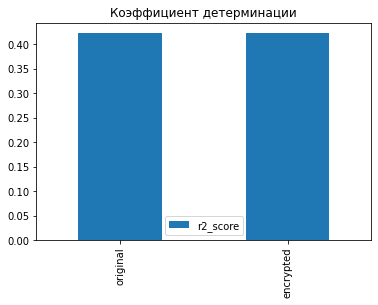

In [23]:
r2_result.plot(kind='bar',title='Коэффициент детерминации')